In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print("\nInitial Data:")
print(df.head())

# 1. Preprocess the dataset
# Handle missing values:
# We will fill numerical columns with the median and categorical columns with the mode.
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')


Initial Data:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [6]:
# 1. Preprocess the dataset
# Handle missing values:
# We will fill numerical columns with the median and categorical columns with the mode.
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')



In [8]:
df['age'] = imputer_num.fit_transform(df[['age']])
df['embarked'] = imputer_cat.fit_transform(df[['embarked']])
df['sex'] = imputer_cat.fit_transform(df[['sex']])



ValueError: 2

In [9]:
df.dropna(subset=['embarked', 'sex'], inplace=True)

In [10]:
# Convert categorical columns to numeric (One-Hot Encoding)
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'embark_town'], drop_first=True)

In [11]:
# 2. Detect and Remove Outliers using Z-Score method
def remove_outliers(df, columns, threshold=3):
    z_scores = np.abs(zscore(df[columns]))
    return df[(z_scores < threshold).all(axis=1)]


In [12]:
# Apply outlier removal on numeric columns
numeric_columns = ['age', 'fare']
df_no_outliers = remove_outliers(df, numeric_columns)

In [13]:

# Display the shape of the dataset after removing outliers
print(f"\nDataset shape after removing outliers: {df_no_outliers.shape}")



Dataset shape after removing outliers: (862, 18)


In [14]:
# Convert numerical columns into boolean values
df_no_outliers['pclass'] = df_no_outliers['pclass'].apply(lambda x: 1 if x == 1 else 0)
df_no_outliers['survived'] = df_no_outliers['survived'].apply(lambda x: 1 if x == 1 else 0)

/tmp/ipykernel_33435/1945238559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['pclass'] = df_no_outliers['pclass'].apply(lambda x: 1 if x == 1 else 0)
/tmp/ipykernel_33435/1945238559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['survived'] = df_no_outliers['survived'].apply(lambda x: 1 if x == 1 else 0)


In [15]:
frequent_itemsets = apriori(df_no_outliers[['pclass', 'survived']], min_support=0.1, use_colnames=True)

/home/abcd/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:


# Generate association rules with a minimum lift of 1.0
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [17]:
# Display association rules
print("\nAssociation Rules:")
print(rules)


Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0  (survived)    (pclass)            0.377030            0.220418  0.138051   
1    (pclass)  (survived)            0.220418            0.377030  0.138051   

   confidence      lift  representativity  leverage  conviction  \
0    0.366154  1.661182               1.0  0.054947    1.229924   
1    0.626316  1.661182               1.0  0.054947    1.667102   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.638906  0.300505   0.186941    0.496235  
1       0.510554  0.300505   0.400157    0.496235  


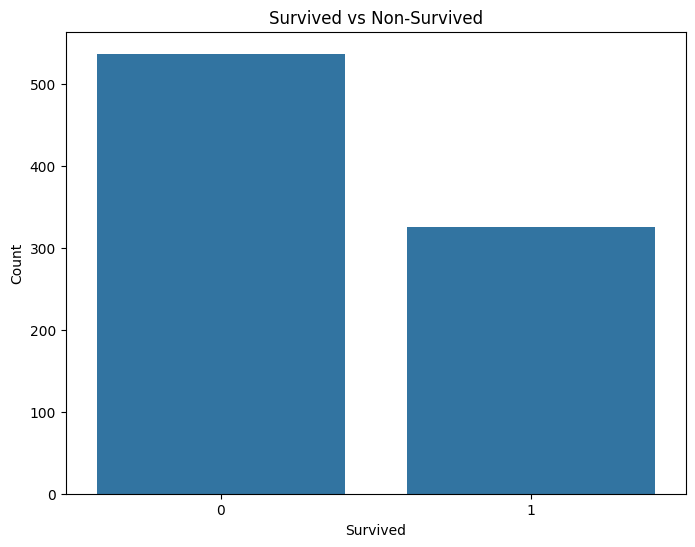

In [19]:
 #Visualization 1: Bar plot showing the number of survivors vs non-survivors
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df_no_outliers)
plt.title("Survived vs Non-Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


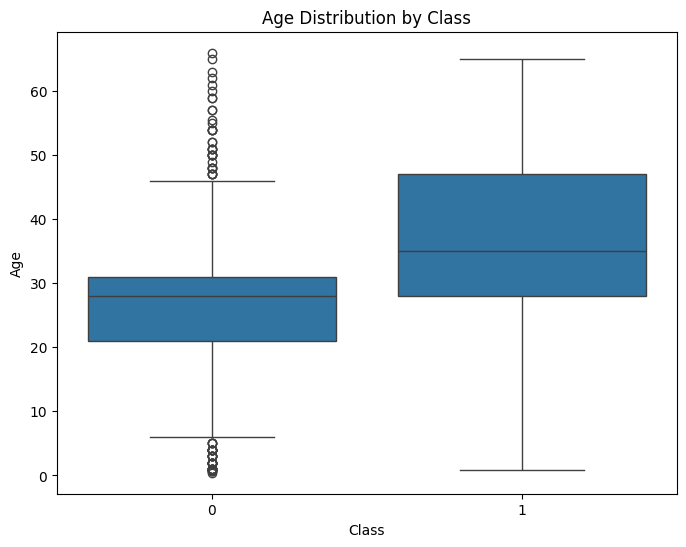

In [20]:
# Visualization 2: Box plot of Age distribution for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=df_no_outliers)
plt.title("Age Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()